In [1]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

import os

In [2]:
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_TRACING_V2=True
TAVILY_API_KEY="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"

In [3]:
from langchain_openai import ChatOpenAI
LLM = ChatOpenAI(temperature=0)


In [4]:
from typing import Literal

class TypedDictState(TypedDict):
    name: str
    mood: Literal["happy","sad"]


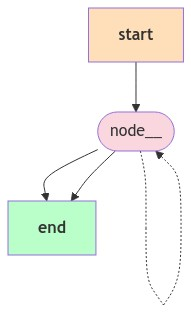

In [9]:
import random
from IPython.display import Image, display
from langchain_core.runnables.graph import  MermaidDrawMethod ,  CurveStyle
from langgraph.graph import StateGraph, START, END


def node_1(state):
    print("---Node 1---")
    return {"name": state['name'] + " is ... "}

def node_2(state):
    print("---Node 2---")
    return {"mood": "happy"}

def node_3(state):
    print("---Node 3---")
    return {"mood": "sad"}

def mood_selector(state)->Literal["node_2", "node_3"]:
    print("---Mood Selector---")
    if(random.random() < 0.5):
        return "node_2"
    
    
    return "node_3"
    
#build graph
graph_builder=StateGraph(TypedDictState)

graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)
graph_builder.add_node("node_3", node_3)

#create connections

graph_builder.add_edge(START,"node_1")
graph_builder.add_conditional_edges("node_1", mood_selector)
graph_builder.add_edge("node_2", END)
graph_builder.add_edge("node_3", END)
graph=graph_builder.compile()

# View
#display(Image(graph.get_graph().draw_mermaid_png()))
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
#Image(graph.get_graph().draw_mermaid_png(), width=1000, height=1000)

In [51]:

graph.invoke({"name":"sree"})


---Node 1---
---Mood Selector---
---Node 2---


{'name': 'sree is ... ', 'mood': 'happy'}

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavilysrch=TavilySearchResults(max_results=3)

searchresults=tavilysrch.invoke("what is electron")
searchresults

[{'url': 'https://www.thoughtco.com/definition-of-electron-chemistry-604447',
  'content': 'An electron is a stable negatively charged component of an atom.Electrons exist outside of and surrounding the atom nucleus. Each electron carries one unit of negative charge (1.602 x 10-19 coulomb) and has a small mass as compared with that of a neutron or proton.Electrons are much less massive than protons or neutrons. The mass of an electron is 9.10938 x 10-31 kg.'},
 {'url': 'https://sciencenotes.org/what-is-an-electron/',
  'content': 'An electron is a subatomic particle with a negative electrical charge. Electrons are subatomic particles. Atoms are made of protons, neutrons, and electrons. Of these three particles, the electron has the smallest mass. Here is the definition of the electron, along with its word origin, history, and interesting facts. Electron Definition'},
 {'url': 'https://scitechdaily.com/science-made-simple-what-are-electrons/',
  'content': 'The electron is a subatomic p

In [35]:
random.random()

0.29158009790716755

In [53]:

from langchain_core.runnables import RunnableLambda


# Define a simple function
def greet(name):
   return f"Hello, {name}!"


# Wrap the function in a RunnableWrapper
greet_runnable = RunnableLambda(lambda x: greet(x))


# Use the runnable to call the function
result = greet_runnable.invoke("srikant")
print(result)  

Hello, srikant!
